Dataset Link: https://www.kaggle.com/datasets/thegoanpanda/fastag-fraud-detection-datesets-fictitious

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('FastagFraudDetection.csv')
data.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [4]:
data.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


## Data Wrangling

In [5]:
data.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [6]:
data.drop('FastagID',axis=1,inplace=True)

In [7]:
data.isnull().sum()

Transaction_ID           0
Timestamp                0
Vehicle_Type             0
TollBoothID              0
Lane_Type                0
Vehicle_Dimensions       0
Transaction_Amount       0
Amount_paid              0
Geographical_Location    0
Vehicle_Speed            0
Vehicle_Plate_Number     0
Fraud_indicator          0
dtype: int64

In [8]:
pd.unique(data['Lane_Type'])

array(['Express', 'Regular'], dtype=object)

In [9]:
data.replace(['Express', 'Regular'],[0,1],inplace=True)

In [10]:
pd.unique(data['Vehicle_Dimensions'])

array(['Large', 'Small', 'Medium'], dtype=object)

In [11]:
data.replace(['Large', 'Small', 'Medium'],[0,1,2],inplace=True)

In [12]:
pd.unique(data['Fraud_indicator'])

array(['Fraud', 'Not Fraud'], dtype=object)

In [13]:
data.replace(['Not Fraud','Fraud'],[0,1],inplace=True)

In [14]:
pd.unique(data['Vehicle_Type'])

array(['Bus ', 'Car', 'Motorcycle', 'Truck', 'Van', 'Sedan', 'SUV'],
      dtype=object)

In [15]:
data.replace(['Bus ', 'Car', 'Motorcycle', 'Truck', 'Van', 'Sedan', 'SUV'],[0,1,2,3,4,5,6],inplace=True)

## Data Visualization

In [16]:
data['Fraud_indicator'].value_counts()

Fraud_indicator
0    4017
1     983
Name: count, dtype: int64

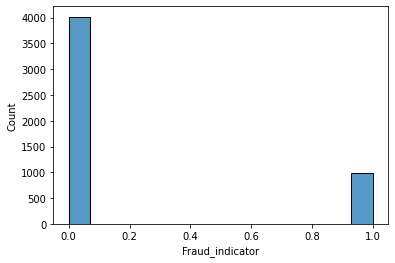

In [17]:
import matplotlib.pyplot as plt
sns.histplot(data['Fraud_indicator'])
plt.show()

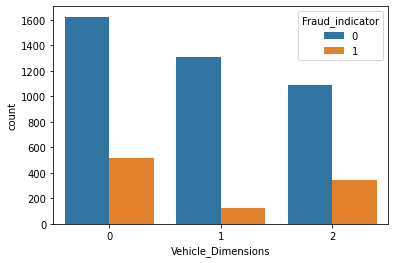

In [18]:
sns.countplot(x='Vehicle_Dimensions',hue='Fraud_indicator',data=data)
plt.show()

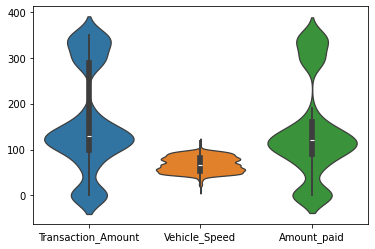

In [19]:
sns.violinplot(data[['Transaction_Amount','Vehicle_Speed','Amount_paid']])
plt.show()

In [20]:
data['Geographical_Location'].value_counts()

Geographical_Location
13.059816123454882, 77.77068662374292    1000
13.042660878688794, 77.47580097259879    1000
12.84197701525119, 77.67547528176169     1000
12.936687032945434, 77.53113977439017    1000
13.21331620748757, 77.55413526894684     1000
Name: count, dtype: int64

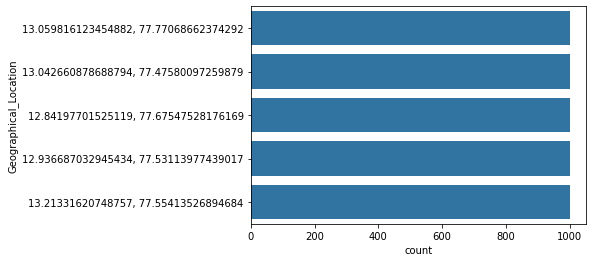

In [21]:
sns.countplot(y='Geographical_Location',data=data)
plt.show()

C:\Users\Aniket\AppData\Local\Temp\ipykernel_8880\1540477429.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Vehicle_Speed'],kde=True)


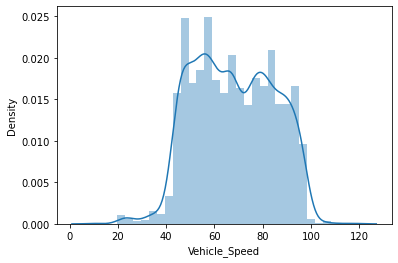

In [22]:
sns.distplot(data['Vehicle_Speed'],kde=True)
plt.show()

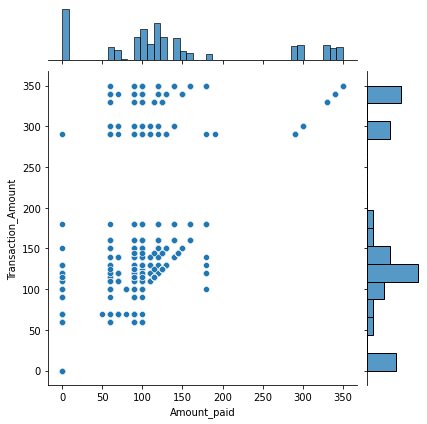

In [23]:
sns.jointplot(y='Transaction_Amount',x='Amount_paid',data=data)
plt.show()

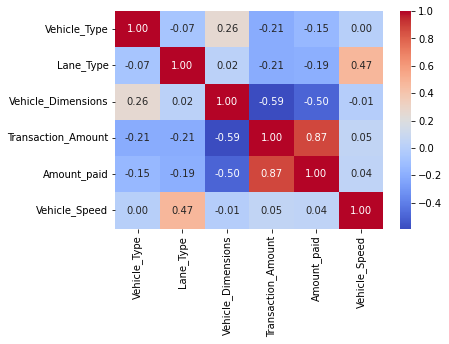

In [24]:
sns.heatmap(data[['Vehicle_Type','Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount', 'Amount_paid','Vehicle_Speed']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

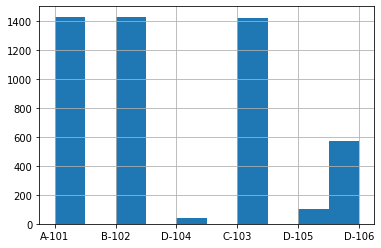

In [25]:
data['TollBoothID'].hist()
plt.show()

## Model Building

In [26]:
x = data[['Transaction_Amount','Amount_paid','Vehicle_Speed','Lane_Type','Vehicle_Dimensions','Vehicle_Type']]
x

,Transaction_Amount,Amount_paid,Vehicle_Speed,Lane_Type,Vehicle_Dimensions,Vehicle_Type
0,350,120,65,0,0,0
1,120,100,78,1,1,1
2,0,0,53,1,1,2
3,350,120,92,1,0,3
4,140,100,60,0,2,4
...,...,...,...,...,...,...
4995,330,330,81,1,0,3
4996,125,125,64,0,2,4
4997,115,115,93,1,2,5
4998,145,145,57,0,0,6


In [27]:
y = data['Fraud_indicator']
y

0       1
1       1
2       0
3       1
4       1
       ..
4995    0
4996    0
4997    0
4998    0
4999    1
Name: Fraud_indicator, Length: 5000, dtype: int64

## Splitting of data into train and test data

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [29]:
x_train

,Transaction_Amount,Amount_paid,Vehicle_Speed,Lane_Type,Vehicle_Dimensions,Vehicle_Type
4227,110,110,44,1,2,5
4676,145,145,61,0,0,6
800,0,0,45,1,1,2
3671,0,0,96,1,1,2
4193,140,140,74,1,0,6
...,...,...,...,...,...,...
4426,70,70,67,0,1,1
466,140,140,61,0,2,4
3092,110,110,52,0,2,4
3772,120,100,67,0,2,5


In [30]:
x_test

,Transaction_Amount,Amount_paid,Vehicle_Speed,Lane_Type,Vehicle_Dimensions,Vehicle_Type
1501,300,300,65,1,0,3
2586,0,0,52,1,1,2
2653,180,180,97,1,0,6
1055,120,120,84,1,2,5
705,100,100,58,1,2,5
...,...,...,...,...,...,...
4711,145,145,83,1,0,6
2313,330,330,83,1,0,3
3214,290,290,50,0,0,0
2732,120,120,46,0,1,1


## Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
lr = RandomForestClassifier()
lr.fit(x_train,y_train)

RandomForestClassifier()

In [33]:
rf_pred=lr.predict(x_test)

In [34]:
y_test

1501    0
2586    0
2653    0
1055    0
705     0
       ..
4711    0
2313    0
3214    0
2732    0
1926    1
Name: Fraud_indicator, Length: 1000, dtype: int64

In [35]:
lr.score(x_train,y_train) #overfitting model

1.0

In [36]:
lr.score(x_test,y_test)

0.995

In [37]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(rf_pred,y_test)
cm

array([[783,   5],
       [  0, 212]], dtype=int64)

## Naive Bayes Classifier

In [38]:
from sklearn.naive_bayes import GaussianNB

In [39]:
nb = GaussianNB()

In [40]:
nb.fit(x_train,y_train)

GaussianNB()

In [41]:
nb_pred=nb.predict(x_test)

In [42]:
nb.score(x_test,y_test)

0.851

In [43]:
nb.score(x_train,y_train)

0.8725

In [44]:
cm=confusion_matrix(nb_pred,y_test)
cm

array([[781, 147],
       [  2,  70]], dtype=int64)

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn = KNeighborsClassifier()

In [47]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [48]:
knn_pred=knn.predict(x_test)

In [49]:
knn.score(x_test,y_test)

0.991

In [50]:
knn.score(x_train,y_train)

0.9965

In [51]:
cm = confusion_matrix(knn_pred,y_test)
cm

array([[783,   9],
       [  0, 208]], dtype=int64)